In [1]:
# ===============================================================
# 📌 1. IMPORT LIBRARIES
# These are standard Python tools for data analysis.
# ===============================================================

import numpy as np              # helps us work with numeric data efficiently
import pandas as pd             # used for working with tables (like Excel)
import matplotlib.pyplot as plt # used for creating plots and charts
import seaborn as sns           # advanced visualization library built on matplotlib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Setting a clean, simple style for our plots
sns.set(style="whitegrid")




In [2]:

# ===============================================================
# 📌 2. LOAD THE IRIS DATASET
# "Iris" is a classic dataset: 150 flowers, 3 species, 4 measurements.
# ===============================================================

from sklearn.datasets import load_iris    # scikit-learn comes with built-in datasets

iris = load_iris()                         # load the dataset into memory

# Convert the data to a Pandas DataFrame (a table structure)
df = pd.DataFrame(
    iris.data,                            # the numeric measurements
    columns=iris.feature_names            # feature names (column titles)
)

# Add the species labels (encoded as 0,1,2)
df["species"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:

# ===============================================================
# 📌 3. FIRST LOOK AT THE DATA
# Just like opening the file and checking first rows in Excel.
# ===============================================================

print("🔎 First 5 rows of the dataset:")
display(df.head())                        # shows the first 5 rows

print("\n📌 Dataset shape (rows, columns):")
print(df.shape)                           # (150 rows, 5 columns)

print("\n📌 Basic info about data types and missing values:")
print(df.info())                          # check if data is clean and types are correct


🔎 First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



📌 Dataset shape (rows, columns):
(150, 5)

📌 Basic info about data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [4]:

# ===============================================================
# 📌 4. SUMMARY STATISTICS
# These give us information about the distribution of the data.
# ===============================================================

print("\n📊 Statistical summary (mean, std, min, max, percentiles):")
display(df.describe())                    # descriptive statistics for numeric columns




📊 Statistical summary (mean, std, min, max, percentiles):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:

# ===============================================================
# 📌 5. CHECK CLASS DISTRIBUTION
# Are the classes balanced? (Important for machine learning later!)
# ===============================================================

print("\n🌸 Species frequency (how many of each):")
print(df["species"].value_counts())       # check how many flowers per class





🌸 Species frequency (how many of each):
species
0    50
1    50
2    50
Name: count, dtype: int64


In [6]:

# ===============================================================
# 📌 6. MAP NUMBERS TO SPECIES NAMES
# This makes visualizations easier to read and more intuitive.
# ===============================================================

species_map = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
df["species_name"] = df["species"].map(species_map)

print("\n✨ After mapping labels:")
display(df.head())


✨ After mapping labels:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


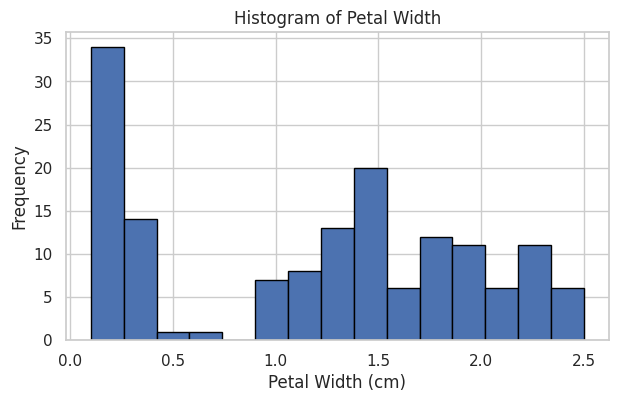

In [7]:


# ===============================================================
# 📌 7. HISTOGRAM
# Used to understand the distribution of a single feature.
# ===============================================================

plt.figure(figsize=(7,4))
plt.hist(df["petal width (cm)"], bins=15, edgecolor="black")
plt.title("Histogram of Petal Width")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Frequency")
plt.show()



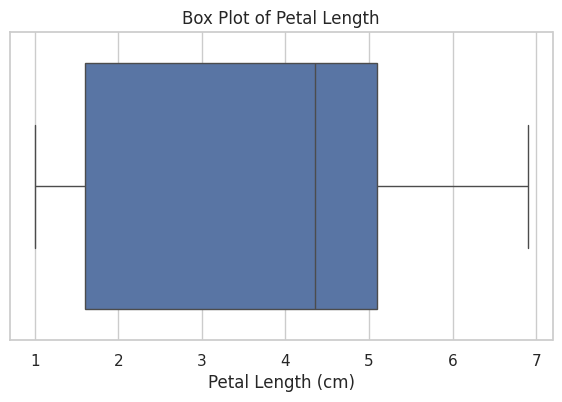

In [8]:


# ===============================================================
# 📌 8. BOX PLOT
# Shows spread, median, IQR (interquartile range), and outliers.
# ===============================================================

plt.figure(figsize=(7,4))
sns.boxplot(x=df["petal length (cm)"])
plt.title("Box Plot of Petal Length")
plt.xlabel("Petal Length (cm)")
plt.show()

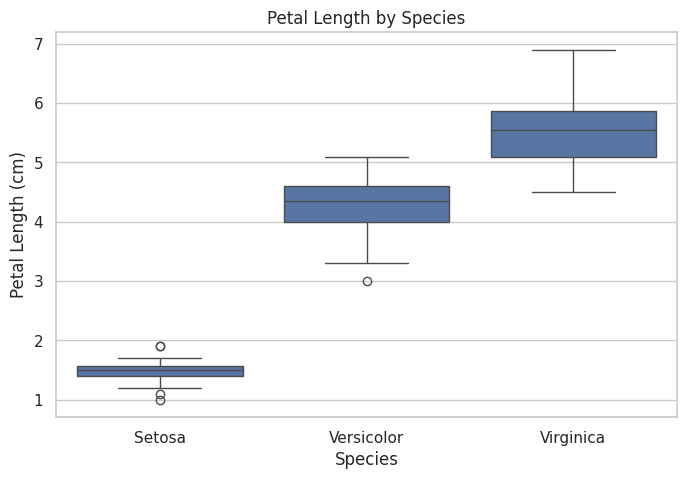

In [9]:
# ===============================================================
# 📌 9. CLASS-WISE BOX PLOT
# Which species has longer petals? Great for pattern recognition.
# ===============================================================

plt.figure(figsize=(8,5))
sns.boxplot(x="species_name", y="petal length (cm)", data=df)
plt.title("Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()

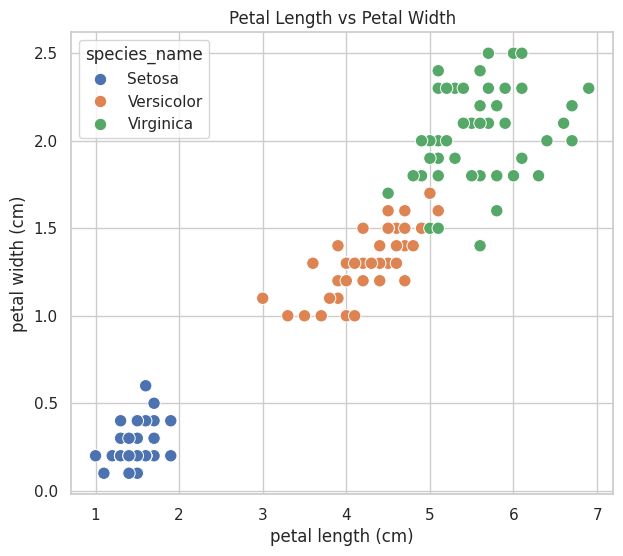

In [10]:

# ===============================================================
# 📌 10. SCATTER PLOT (Relationship between two variables)
# We add color by species to see natural grouping.
# ===============================================================

plt.figure(figsize=(7,6))
sns.scatterplot(
    x="petal length (cm)",
    y="petal width (cm)",
    hue="species_name",
    data=df,
    s=80
)
plt.title("Petal Length vs Petal Width")
plt.show()



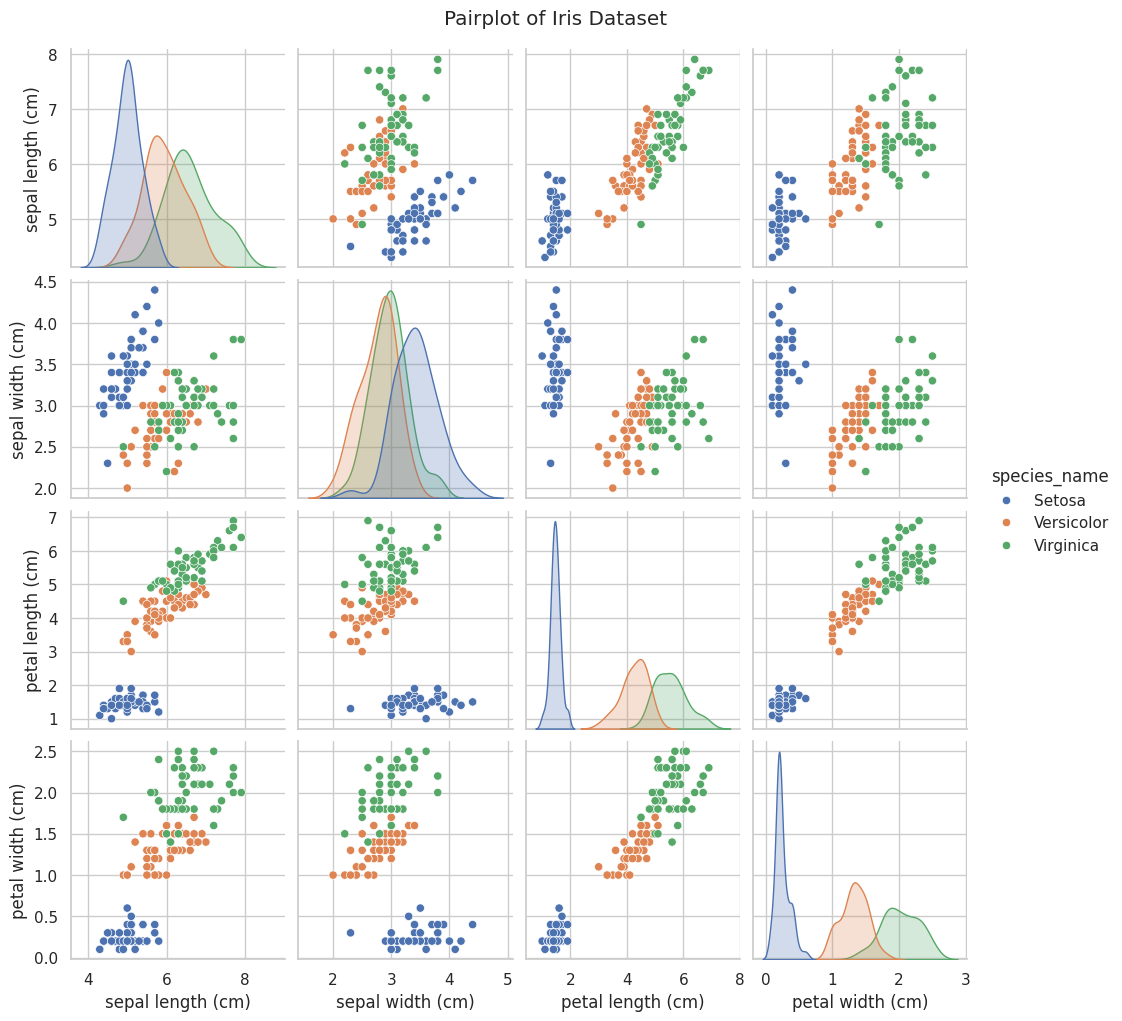

In [11]:

# ===============================================================
# 📌 11. PAIRPLOT (Scatter plot matrix)
# A very powerful summary. Shows all pairwise relationships.
# ===============================================================

sns.pairplot(df, hue="species_name", vars=iris.feature_names)
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()


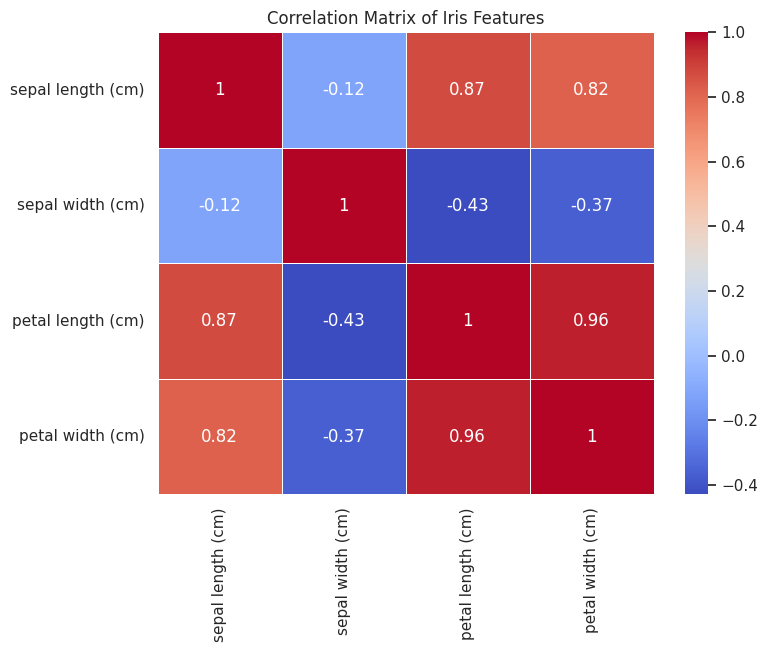

In [12]:

# ===============================================================
# 📌 12. CORRELATION MATRIX
# Shows how strongly features are related (from -1 to +1).
# ===============================================================

corr = df[iris.feature_names].corr()  # calculate correlation

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Iris Features")
plt.show()

In [13]:


# ===============================================================
# 🎉 END OF PRACTICE SESSION
# Students now understand EDA foundations for ANY dataset.
# ===============================================================

print("\n🎉 Congratulations! You've completed a full EDA workflow.")
print("You looked at structure, statistics, distributions, relationships, and correlations.")
print("This is the foundation of every data science project 🚀")



🎉 Congratulations! You've completed a full EDA workflow.
You looked at structure, statistics, distributions, relationships, and correlations.
This is the foundation of every data science project 🚀
